In [56]:
%matplotlib notebook
import math
import numpy as np
from skimage.measure import label, regionprops
from skimage import data, color
import matplotlib.pyplot as plt
from scipy.ndimage.filters import sobel
from skimage.morphology import watershed
from skimage import filters
from scipy import ndimage as ndi
import skimage
import pandas as pd
import glob as glob
import pims
import exifread
import matplotlib
matplotlib.style.use('classic')

In [8]:
frames = pims.ImageSequence('./film2/thin/f2-thin3-exp*')

In [38]:
#Function to read in files, return dataframe with main qualities
filebase='./film2/thin/f2-thin3*'
filelist = pd.Series(glob.glob(filebase))
frames = pd.Series(plt.imread(f) for f in filelist)
expTime = filelist.str.extract('.[Ee]xp(\d*d?\d*)').str.replace('d','.').astype(float)
mainFrame = pd.DataFrame({'name': filelist, 'exp (ms)':expTime})


<IPython.core.display.Javascript object>


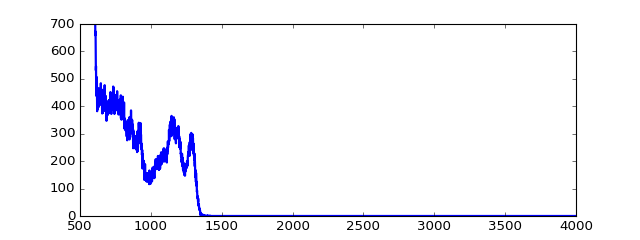

(0, 700)

In [61]:
#Function to operate on test image

#First plot histogram
testimage = np.copy(frames[0])
hst = np.histogram(testimage, bins = np.arange(0,4096))
fig, ax = plt.subplots(figsize=(8,3))
plt.plot(hst[1][:-1],hst[0],lw=2)
plt.xlim([500,4000])
plt.ylim([0,700])

<IPython.core.display.Javascript object>


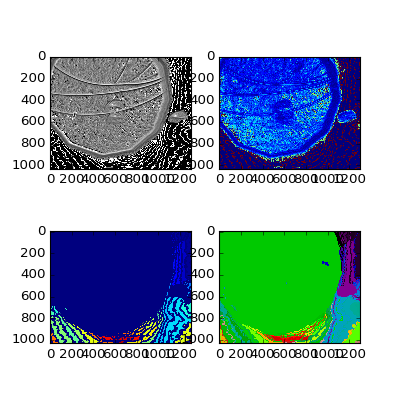

In [87]:
#Function to preform image segmentation
denoised = filters.rank.autolevel(filters.rank.median(testimage,skimage.morphology.disk(10)),skimage.morphology.disk(5))

#markers =filters.scharr(testwithedge/4000.)<.04
markers = filters.rank.gradient(denoised,skimage.morphology.disk(4))<6
markers,reg = ndi.label(markers)

gradient = filters.rank.gradient(denoised, skimage.morphology.disk(1))
#gradient = filters.scharr(testwithedge/4000.)

labels = watershed(gradient,markers)

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(5,5))
axes = ax.ravel()
ax0,ax1,ax2,ax3=axes
ax0.imshow(denoised,cmap='gray')
ax1.imshow(gradient)
ax2.imshow(markers)
ax3.imshow(labels,cmap=plt.cm.spectral)
#fig,ax = plt.subplots(figsize=(5,5))
#plt.imshow(test_copy,cmap='gray')

In [65]:
gradient

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 2, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint16)

In [24]:
t

('software', 'MetaMorph 6.1')